# Exercise 5.6
### Introduction
$$ \int_{0}^{2}(x^4 -2x+1)dx$$ with N = 20 with trapezoid. Calculate error with $\epsilon _2 = ch_2^2 = {1 \over 3}(I_2 - I_1)$ For error, N1 = 10 and N2 = 20. True value is 4.4

In [28]:
import numpy as np
a = 0
b = 2
f = lambda x: x**4 - 2*x +1
N = 20
h = (b-a)/N
S = (f(a)+f(b))/2
for k in range(1,N):
    S += f(a+k*h)
S = h*S
print(f'The integral of the above equation evaluates to {S:.5f} with {N} slices.')
N2 = N
I2 = S

N1 = 10
a = 0
b = 2
f = lambda x: x**4 - 2*x +1
N = 10
h = (b-a)/N
S = (f(a)+f(b))/2
for k in range(1,N):
    S += f(a+k*h)
S = h*S
I1 = S

ϵ = 1/3 * (I2-I1)
print(f'The error is {ϵ:.5f}')

The integral of the above equation evaluates to 4.42666 with 20 slices.
The error is -0.02663


### Conclusion
There is an error of 0.02663 but the integral evaluates to 4.42666. There is a little bit of an error between the two errors. They do not agree. I can't figure out why.

# Exercise 5.2
### Introduction
Doing the integration of same integral in 5.6, but with Simpson's rule

In [32]:
N = [10,100,1000]
f = lambda x: x**4 -2*x+1
for i in range(3):
    a = 0
    b = 2
    h = (b-a)/N[i]
    S = f(a)+f(b)
    for k in range(1,N[i],2):
        S+= 4*f(a+k*h)
    for k in range(2,N[i],2):
        S+= 2*f(a+k*h)

    S = 1/3 * h*S
    print(f'The approximate value is {S:.3f} with {N[i]} slices.')
    print(f'The fractional error is {S/4.4 :.4f}')


The approximate value is 4.400 with 10 slices.
The fractional error is 1.0001
The approximate value is 4.400 with 100 slices.
The fractional error is 1.0000
The approximate value is 4.400 with 1000 slices.
The fractional error is 1.0000


### Conclusion
The value doesn't change as we increase the number of slices.

# Exercise 5.3
### Introduction
Calculate $ E(x) = \int_{0}^{x}e^{-t^2}dt$ and plot as a function of $x$

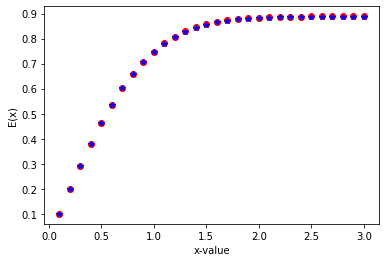

In [14]:
import matplotlib.pyplot as plt
import numpy as np
inside = lambda t: np.exp(-t**2)
xList = np.arange(0.1,3.1,0.1)
N = 500

#Rectangular
for x in xList:
    t,dt = np.linspace(0,x,N, retstep = True)
    E = dt * sum(inside(t))
    plt.plot(x,E,'ro')
    
#Trapezoidal
a = 0
for b in xList: 
    h = (b-a)/N
    S = 1/2*inside(a)+1/2 * inside(b)
    for k in range(1,N):
        S+= inside(a+k*h) 
    plt.plot(b,h*S,'b*')
    
plt.ylabel('E(x)')
plt.xlabel('x-value')
plt.show()

### Conclusion
It approaches 0.9 as x approaches 3.
I first did rectangular approximation in red and then trapezoidal approximation in blue. 

# Exercise 5.4
### Introduction
Calculate $$J_m (x)= {1 \over \pi} \int_{0}^{\pi} cos(m\theta -xsin \theta)d\theta$$
using Simpson's Rule. Plot when m=0,1,2 from x = 0 to x = 20.

Then make density plot of the intensity of light in a diffraction pattern with $\lambda = 500 $nm where $k=2\pi / \lambda$ 
$$ I(r) = ({J_1(kr) \over kr})^2$$

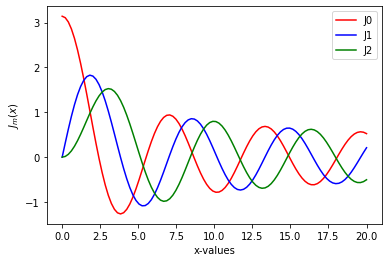

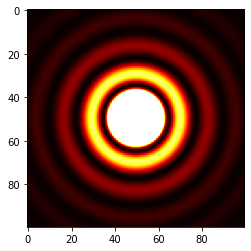

In [35]:
import matplotlib.pyplot as plt
import numpy as np

#Part 1
def f(m,x,theta):
    return np.cos(m*theta-x*np.sin(theta))
def J(m,x):
    N = 1000
    a = 0
    b = np.pi
    h = (b-a)/N
    S = f(m,x,a)+f(m,x,b)
    for k in range(1,N,2):
        S+= 4*f(m,x,a+k*h)
    for k in range(2,N,2):
        S+= 2*f(m,x,a+k*h)
    return 1/3 * h*S
colorList = ['r','b','g']  # list to change color as I go in plotting
legendList = ['J0','J1','J2']  # List to change label in legend as I go
x = np.linspace(0,20,100) # plot from 0 to 20

for m in range(0,3):
    Jlist = [] # Makes a new list each time to plot
    for i in x:
        Jlist.append(J(m,i))
    plt.plot(x,Jlist,colorList[m],label=legendList[m])
plt.legend()
plt.xlabel('x-values')
plt.ylabel(r'$J_m(x)$')
plt.show()

#Part 2
def I(r,λ): #Formula Given
    k = 2*np.pi/λ
    return (J(1,k*r)/k/r)**2
λ = 500e-9 # Wavelength given
N = 100   #Number of points I chose
x = np.linspace(-1e-6,1e-6,N)   # Go 1 μm left and right
y = x # Also up down
x,y = np.meshgrid(x,y)  # Making square grid 
r = np.sqrt(x**2+y**2)  # radius is sqrt(x^2 + y^2)
plt.imshow(I(r,λ),vmax=0.05)  #Plot in imshow plugging into formula
plt.hot() #Change color scheme


### Conclusion
That was not easy. I forgot to multiply by 4 and 2 at first. The map looks good. I made sure to add comments because I know I will need it in the future.